In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
x,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=2)

In [3]:
x.shape

(100, 2)

In [4]:
y.shape

(100,)

In [5]:
x[0:5]

array([[ 0.18757605, -9.8171527 ],
       [-3.93955141, -9.57292799],
       [-0.72864791, -7.18926735],
       [ 0.27399572, -1.87696674],
       [ 1.35238289, -0.67133173]])

In [6]:
y[:5]

array([0, 0, 0, 1, 1])

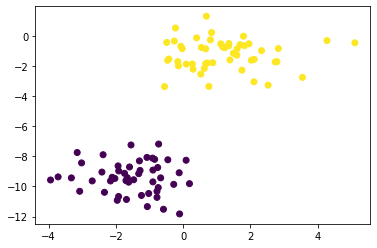

In [7]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
x_train.shape,y_train.shape

((80, 2), (80,))

In [52]:
x_test.shape,y_test.shape

((20, 2), (20,))

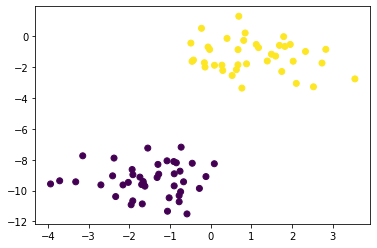

In [53]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

In [54]:
def distance(p1,p2):
    return((p2-p1)**2).sum()**0.5

In [55]:
distance(np.array([1,1]),np.array([4,2]))

3.1622776601683795

In [62]:
from scipy import stats
def kNN(X_train,Y_train,x_query,k=5):
    distances=[]
    for i in range(len(x_train)):
        d=distance(x_train[i],x_query)
        distances.append((d,y_train[i]))
    distances=sorted(distances)
    nearest_distances=distances[:k]
    nearest_distances=np.array(nearest_distances)
    labels=nearest_distances[: ,-1]
    majority=stats.mode(labels)
    return majority[0][0]

In [63]:
kNN(x_train,y_train,x_test[-2])

0.0

In [64]:
x_test[-2]

array([-1.59361015, -8.71046363])

In [65]:
x_test[5]

array([ 1.35830307, -0.51947011])

In [66]:
kNN(x_train,y_train,x_test[5])

1.0

In [67]:
kNN(x_train,y_train,x_test[10])

0.0

In [68]:
y_pred=[]
for xq in x_test:
    p=kNN(x_train,y_train,xq)
    y_pred.append(p)

In [69]:
y_pred

[1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0]

In [70]:
y_test

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1])

# SKLEARN-kNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
model=KNeighborsClassifier(n_neighbors=5)

In [75]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [76]:
model.predict(x_test)

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [77]:
model.score(x_test,y_test)

1.0

# Digit Classification

In [78]:
from sklearn.datasets import load_digits

In [80]:
digits=load_digits()

In [81]:
print(digits.data.shape)

(1797, 64)


In [82]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [83]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [84]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [85]:
digits['images'].shape

(1797, 8, 8)

In [86]:
digits['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

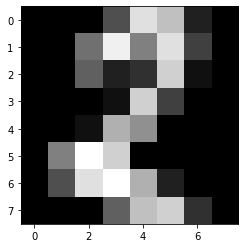

In [102]:
plt.imshow(digits['images'][50],cmap='gray')
plt.show()

In [101]:
digits['target'][50]

2

In [103]:
x=digits['data']
y=digits['target']

In [104]:
x.shape

(1797, 64)

In [105]:
y.shape

(1797,)

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [108]:
x_train.shape,y_train.shape

((1437, 64), (1437,))

In [109]:
x_test.shape,y_test.shape

((360, 64), (360,))

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
model=KNeighborsClassifier(n_neighbors=7)

In [155]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [156]:
model.score(x_test,y_test)

0.9888888888888889

In [157]:
model.predict(x_test[13])

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.  0.  5. 12.  9.  1.  0.  0.  0.  0. 14. 14. 13. 13.  0.  0.  0.  3.
 12.  1.  1. 13.  4.  0.  0.  7.  8.  0.  0.  6.  8.  0.  0.  8.  8.  0.
  0.  5.  8.  0.  0.  5. 10.  0.  0. 11.  4.  0.  0.  1. 15.  9. 11. 13.
  0.  0.  0.  0.  7. 15. 12.  2.  0.  0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [158]:
model.predict(x_test[13].reshape(1,64))

array([0])

In [159]:
x_test[13].reshape(8,8)

array([[ 0.,  0.,  5., 12.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 14., 14., 13., 13.,  0.,  0.],
       [ 0.,  3., 12.,  1.,  1., 13.,  4.,  0.],
       [ 0.,  7.,  8.,  0.,  0.,  6.,  8.,  0.],
       [ 0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.],
       [ 0.,  5., 10.,  0.,  0., 11.,  4.,  0.],
       [ 0.,  1., 15.,  9., 11., 13.,  0.,  0.],
       [ 0.,  0.,  7., 15., 12.,  2.,  0.,  0.]])

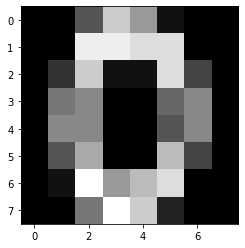

In [160]:
plt.imshow(x_test[13].reshape(8,8),cmap='gray')
plt.show()

In [161]:
def predict_and_plot(idx):
    pred=model.predict(x_test[idx].reshape(1,64))
    print('Predicted',pred)
    plt.imshow(x_test[idx].reshape(8,8),cmap='gray')
    plt.show()
    

Predicted [3]


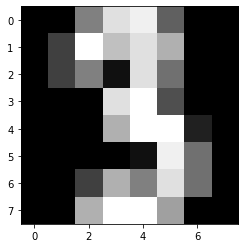

In [162]:
predict_and_plot(16)

Predicted [6]


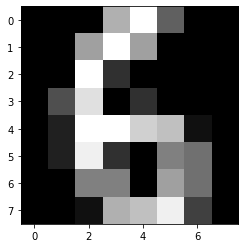

In [163]:
predict_and_plot(54)

In [164]:
model.score(x_test,y_test)

0.9888888888888889

In [165]:
x_test[0]

array([ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
        0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
       15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,  8., 10.,  8.,
        0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11.,
        0.,  5., 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.])

In [166]:
x_test[0].shape

(64,)

In [167]:
x_test[0].reshape(1,64)

array([[ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,  8., 10.,  8.,
         0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11.,
         0.,  5., 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.]])

In [168]:
x_test[0].reshape(8,8)

array([[ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0., 12., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 15., 10.,  8.,  6.,  1.,  0.],
       [ 0.,  0., 15., 16.,  8., 10.,  8.,  0.],
       [ 0.,  0., 14.,  7.,  0.,  0., 12.,  0.],
       [ 0.,  0.,  8., 11.,  0.,  5., 16.,  2.],
       [ 0.,  0.,  0.,  9., 14., 14.,  5.,  0.]])

In [169]:
from sklearn.linear_model import LogisticRegression

In [170]:
model=LogisticRegression()

In [171]:
model.fit(x_train,y_train)

C:\Users\arora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [174]:
model.score(x_test,y_test)

0.9694444444444444